## 1. Basic Libraries requirement

In [27]:
import numpy as np #Linear algebra library
import pandas as pd # data processing library/ CSV file IO 


import os
for dirname, _, filenames in os.walk('D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input'): #Function to traverse a direction tree starting from specified path
    for filename in filenames:
        print(os.path.join(dirname, filename))

# The outer loop iterates over these tuples, unpacking them into dirname, subdirs, and filename.
# The inner loop then iterates over the list of filenames in the current directory, printing the pull path
# of each file by joining the direction name and the filename using os.path.join()

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\heart.csv
D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\o2Saturation.csv


## 2. Loading the Dataset

In [30]:
df = pd.read_csv("D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\heart.csv")
# Read csv file from the path above

In [31]:
df 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2.1 Initial analysis on the dataset

In [33]:
df.head(10) # show first 10 rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [37]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [40]:
df.columns = new_columns # assign column names
df.head() 
# you can check the name of some columns has been changed

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [42]:
df.info()

# The Data Set consists of 3030 Rows and 14 Columns
# The type of all the variables in the data set are in numerical format.
# According to first impression, there is no missing value(NaN value) in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 3. Prepare for Exploratory Data Analysis (EDA)

### 3.1 Examining Missing Values

In [44]:
df.isnull().sum() 
# there is no missing value(NaN value) in the data set

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
isnull_number = []
for index in df.columns:
    x = df[index].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


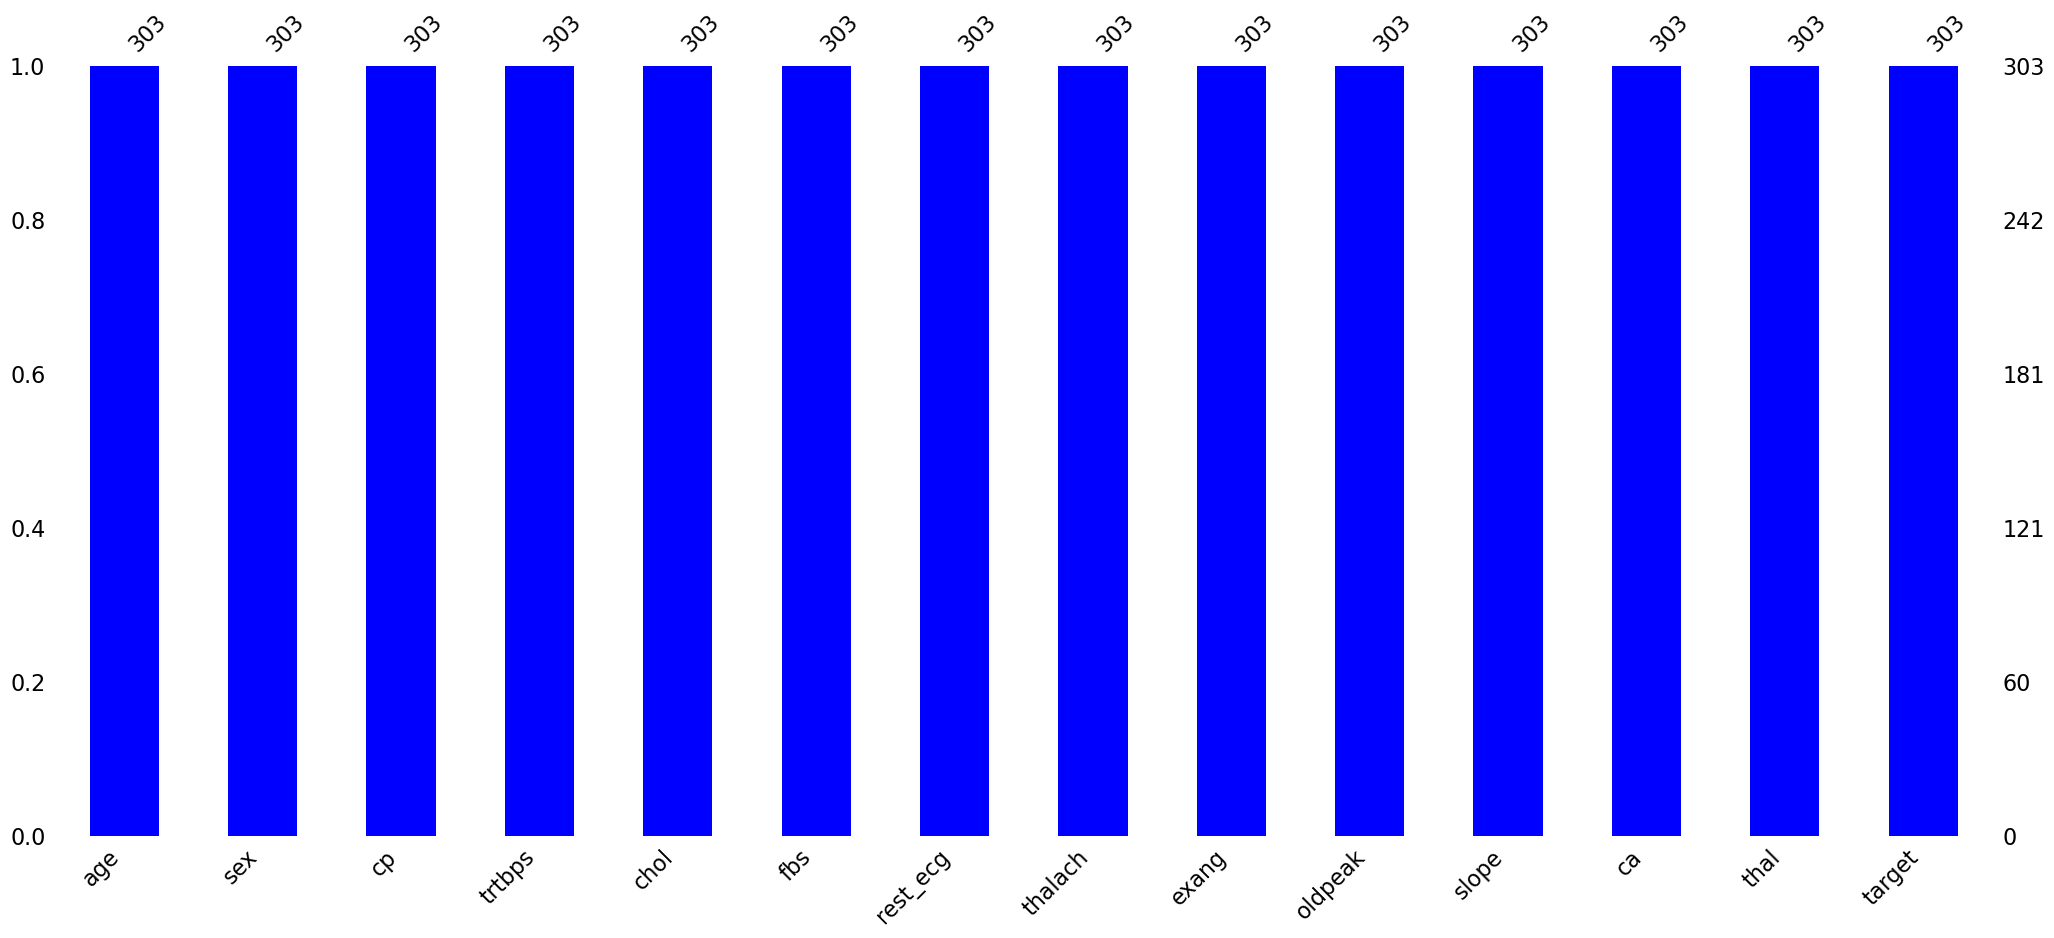

In [47]:
import missingno
missingno.bar(df, color= "b")
plt.show()

### 3.2 Examining Unique Values

In [48]:
# UNique value is the observation values that are not
# similar to each other in the variables.

df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
unique_number = []
for index in df.columns:
    x = df[index].value_counts().count() # declare the total variable in each column and count for the distinction
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


**Analysis Outputs**
* According to the result from the unique value dataframe:
    * We determined the variables with few unique values as categorical variables, and the variables with high unique as numeric variables.
    * In this context, **Numeric Variables**: "age", "trtbps", "chol", "thalach" and "oldpeak"
    * **Categorical Variables**: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal" and "target"

### 3.3 Separating Variables (Numeric or Categorical)

In [55]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### 3.4 Examining Statistics of Variables

In [58]:
# Apply the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we inferred from the describe method are below the graphs of
# each variable below. 

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### 3.4.1 Analysis Output

'\nExplain this such of segment: \n- sns.distplot is a function from \'seaborn\' used to plot a univariate distribution of observations.\n- df["age"]: This accesses the "age" column from the DataFrame df. It extracts the data to be plotted.\n- dict(linewidth=1, edgecolor="k") specifies these keyword arguments:  Sets the width of the lines (borders) of the histogram bars to 1\nand Sets the color of the edges of the histogram bars to black.\n- \';\' : The semicolon at the end of the line suppresses the output in Jupyter notebooks, preventing the automatic display \nof object information when plotting.\n'

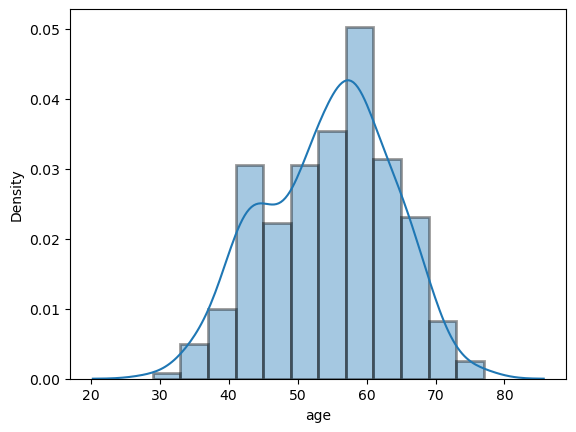

In [76]:
# "age" variable
sns.distplot(df["age"], hist_kws = dict(linewidth = 2, edgecolor = "k"));
"""
Explain this such of segment: 
- sns.distplot is a function from 'seaborn' used to plot a univariate distribution of observations.
- df["age"]: This accesses the "age" column from the DataFrame df. It extracts the data to be plotted.
- dict(linewidth=1, edgecolor="k") specifies these keyword arguments:  Sets the width of the lines (borders) of the histogram bars to 1
and Sets the color of the edges of the histogram bars to black.
- ';' : The semicolon at the end of the line suppresses the output in Jupyter notebooks, preventing the automatic display 
of object information when plotting.
"""

**Analysis of "age" variable according to Describe() method**:

* The minimum value of the ages is 29, and the maximum is 77.
* So wee can calculate the average must be 53
* That means the age variable has a normal distribution. The normal distribution is the ideal
    statistical distribution for us.
* The data average is in the middle of the 25% and 75% quarters. This means that the age
    variable is prone to the normal distribution.

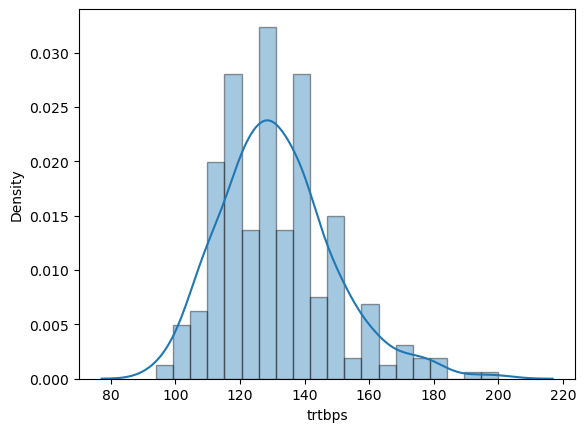

In [77]:
# "trtbps" variable
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);
# bins: are essentially the containers or ranges into which the continuous data is divided to create
# the histogram.

**Analysis of "trtbps" variable according to Describe() method**:
* The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147
* The major average is 131
* There is not much difference between 131 and 147. So "trtbps" data tends to be normally distributed.
* However, very little data remains on the left side of 147. This means that when we take the midpoint of the minimum value and the maximum value as a basis, the data on the left is more than on the right.
* So, there will be a small queue towards the right side due to the lack of data on the right side.
* In summary, we can say that this data is prone to a normal distribution, but there is a slight right skew 

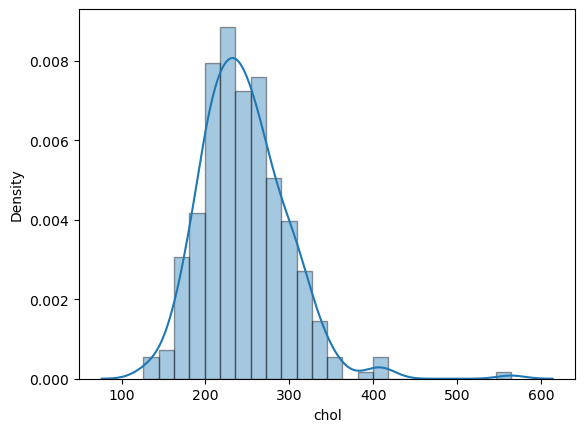

In [82]:
# "chol" variable
sns.distplot(df["chol"], hist_kws= dict(linewidth=1, edgecolor='k'));

**Analysis of "chol" variable according to Describe() method
* The minimum value for the "chol" variable is 126, and the maximum is 564. The middle of these two values is 345.
* The major average is 246.
* When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value.
* Let's check the quartiles. There are values up to 274 in the first 75 percent. Considering that the maximum value is 564, we see that most of the data is on the left.
* So data is slightly skewed to the right due to values that outlier

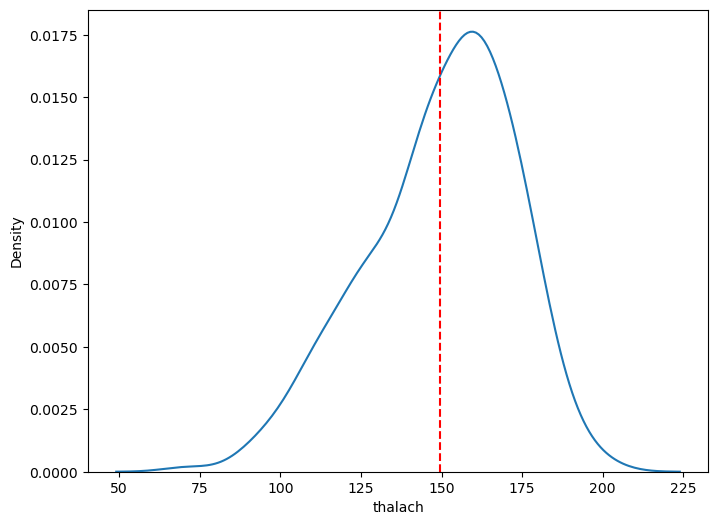

In [85]:
# "thalach" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--"); 
# create the red line present for the mean of "thalach" values.

**Analysis of "thalach" variable according to Describe() method**
* The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.
* The central average is 149.6
* So there is a left skew, although not much.
* When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
* As a result, the data tends to be normally distributed, but there is a slight left skew.

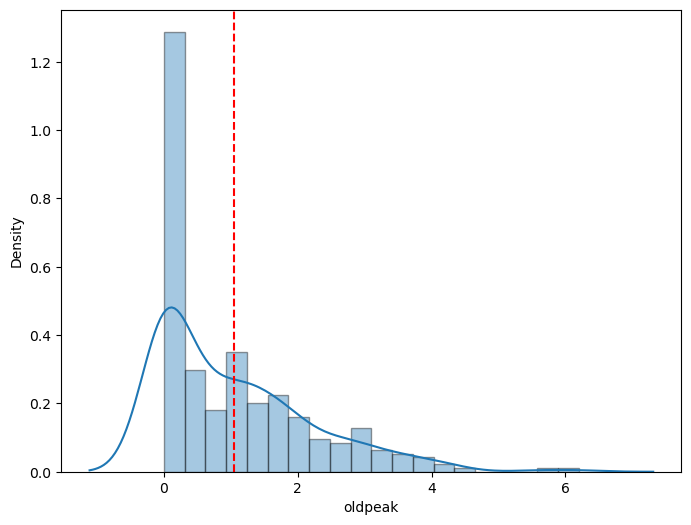

In [86]:
# "oldpeak" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

**Analysis of "oldpeak" variable according to Describe() method**
* The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
* When we look at the mean, we see that it is 1.03
* When we examine the quartiles, 75% of the data consists of values up to 1.60
* This shows that; There is an incredible right skew in the data.